In [1]:
# ==============================================================================
# Cell 1: Imports
# ==============================================================================
import gensim
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
import re

# Paths
MODELS_PATH = '../output/models'
FIGURES_PATH = '../output/figures'
os.makedirs(FIGURES_PATH, exist_ok=True)

print("✅ Libraries imported.")

✅ Libraries imported.


In [2]:
 # ==============================================================================
# Cell 2: Load the LDA Model
# ==============================================================================
model_path = os.path.join(MODELS_PATH, 'lda_model')
try:
    lda_model = gensim.models.LdaMulticore.load(model_path)
    print("✅ LDA Model loaded.")
except Exception as e:
    raise FileNotFoundError(f"❌ Model not found at {model_path}. Did Phase 3 run?")

✅ LDA Model loaded.


Generating word clouds...
✅ Topic word clouds saved to: ../output/figures/topic_word_clouds.png


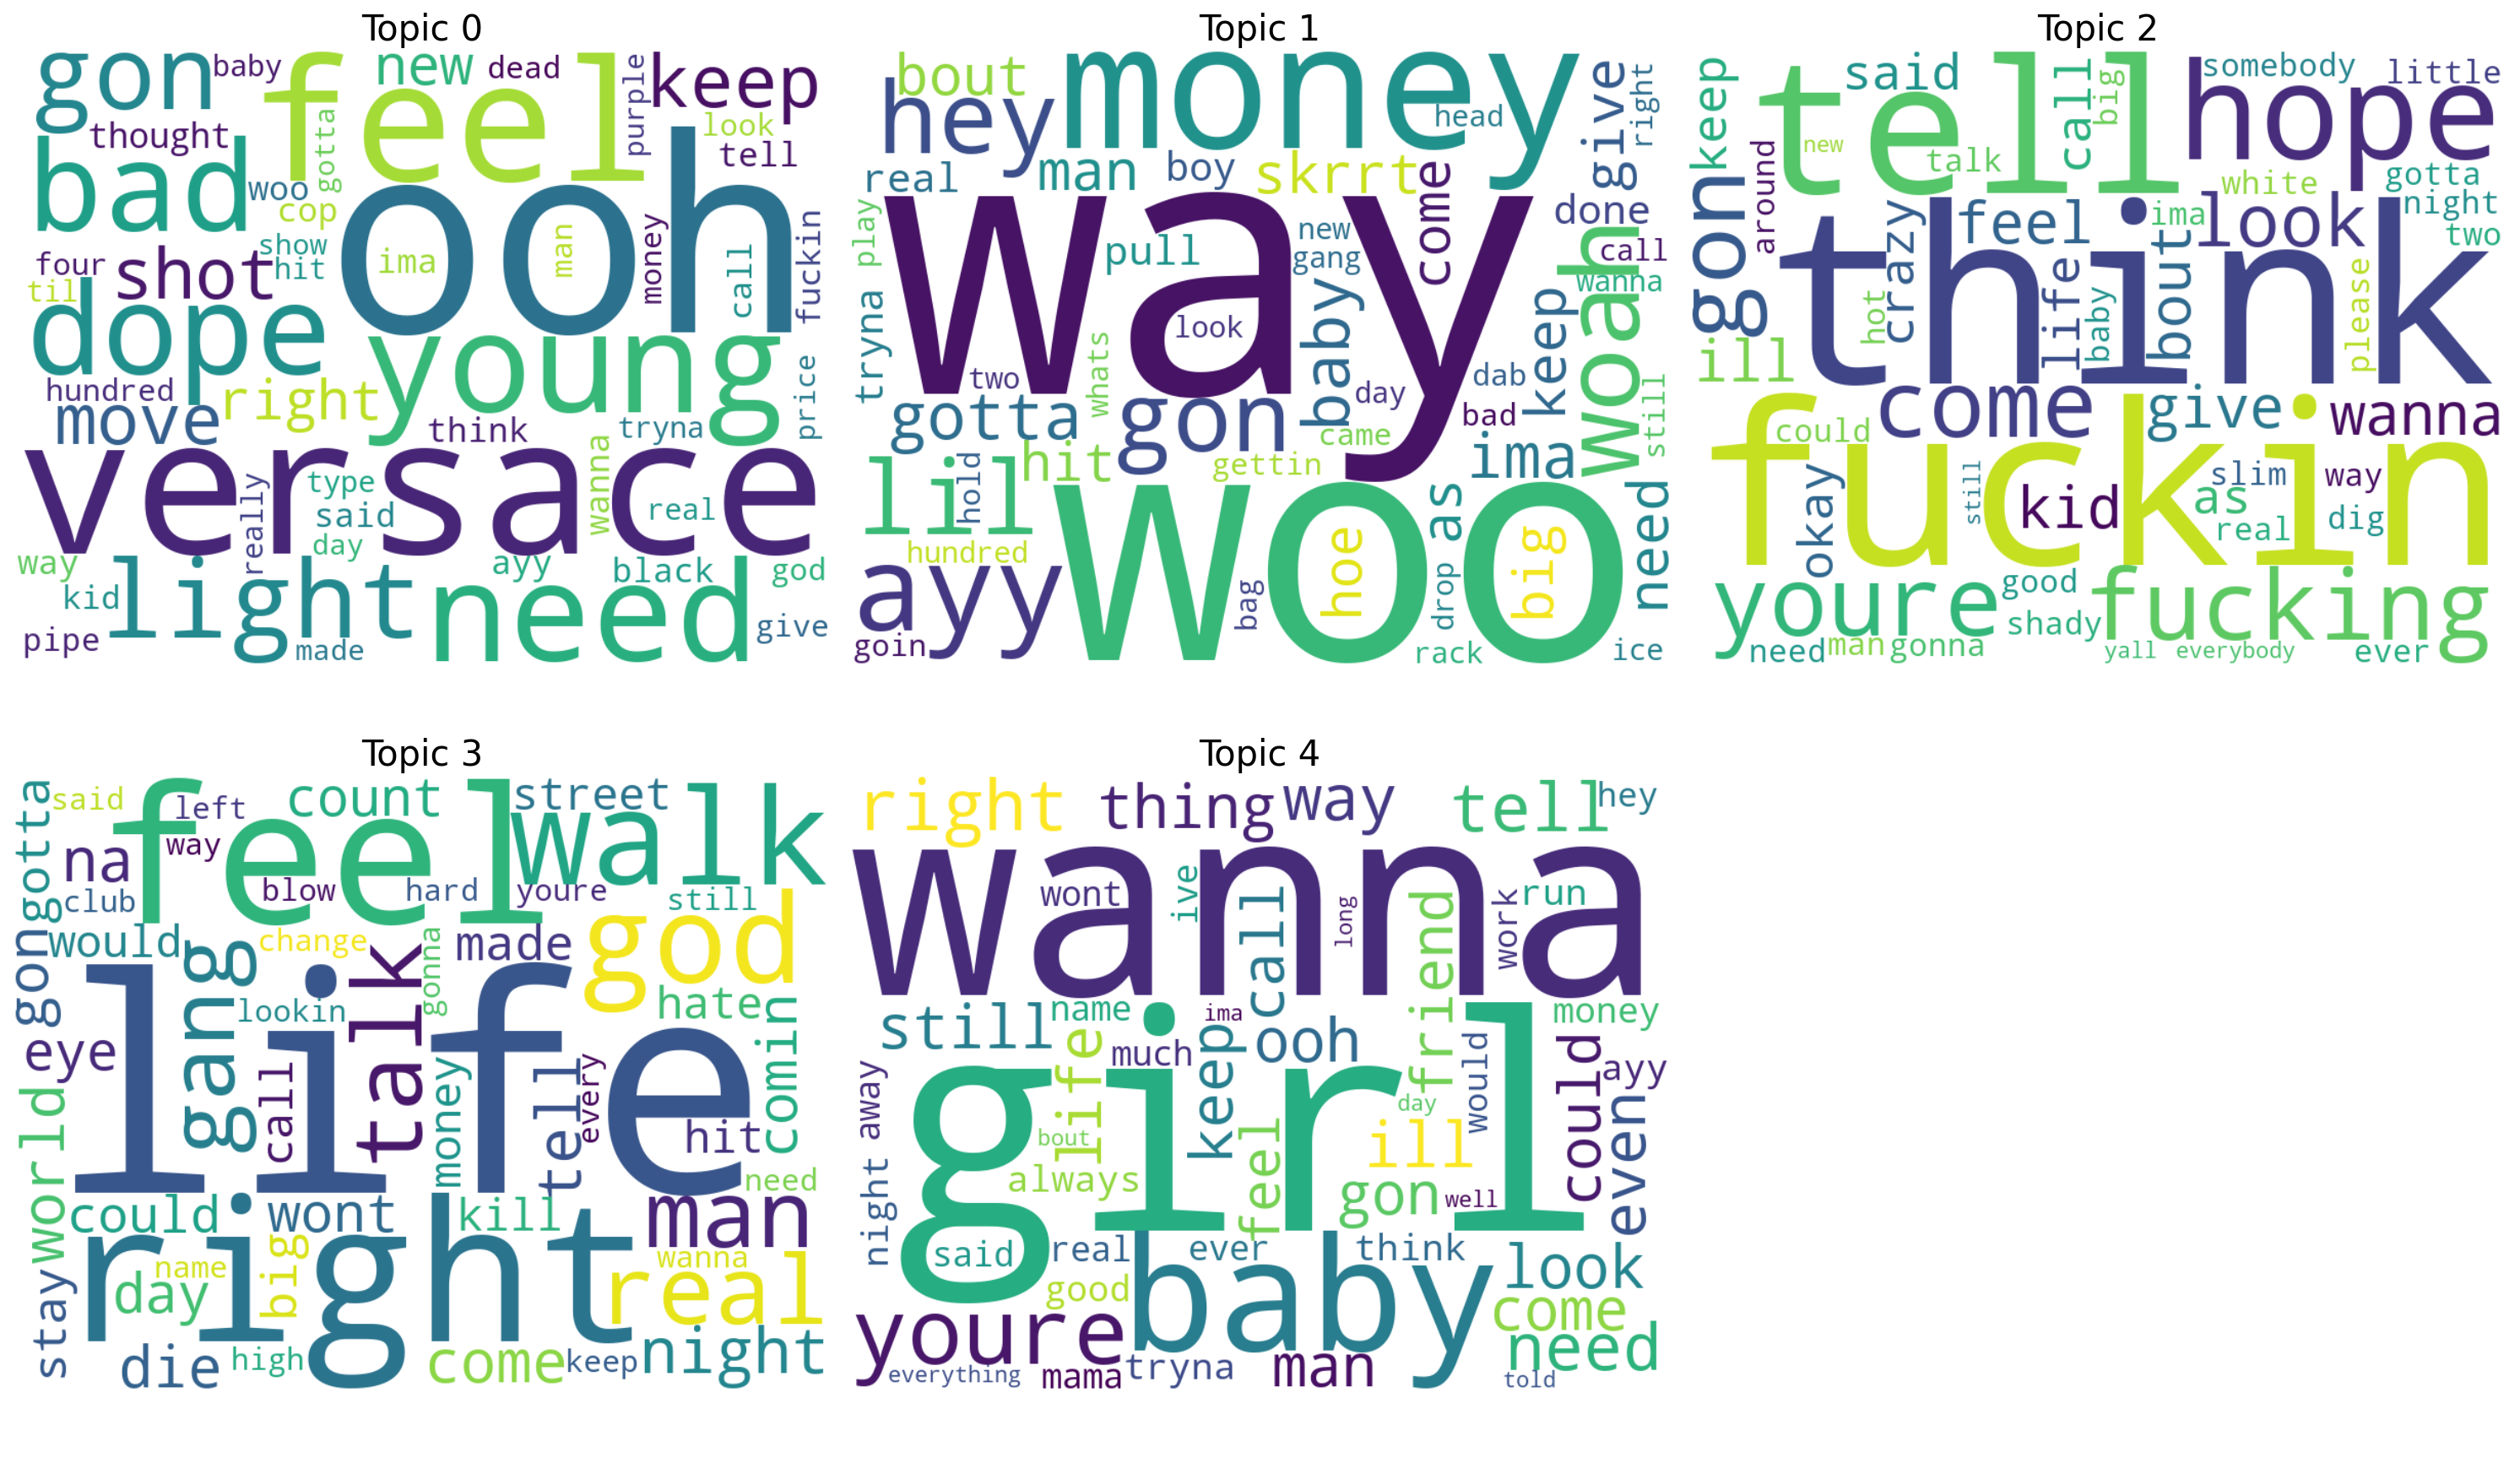

In [3]:
# ==============================================================================
# Cell 3: Generate and Save Word Clouds
# ==============================================================================
# Get the topics from the model
# .show_topics() gives a list of (topic_id, word_string)
topics = lda_model.show_topics(num_topics=5, num_words=50, formatted=False)

# We will create a 2x3 grid to plot 5 topics
fig, axes = plt.subplots(2, 3, figsize=(20, 12), dpi=150)
axes = axes.flatten() # Flatten the 2x3 grid into a list of 6 axes

print("Generating word clouds...")

for i, (topic_id, words) in enumerate(topics):
    # Convert the list of (word, probability) tuples into a dictionary
    topic_words = {word: prob for word, prob in words}
    
    # Create the WordCloud object
    wc = WordCloud(width=800, 
                   height=600, 
                   background_color='white',
                   colormap='viridis')
    wc.generate_from_frequencies(topic_words)
    
    # Plot on the subplot
    ax = axes[i]
    ax.imshow(wc, interpolation='bilinear')
    ax.set_title(f"Topic {topic_id}", fontsize=20)
    ax.axis('off')

# Hide the last (unused) subplot
axes[5].axis('off')

plt.tight_layout()

# Save the combined figure
fig_path = os.path.join(FIGURES_PATH, 'topic_word_clouds.png')
plt.savefig(fig_path, dpi=300, bbox_inches='tight')
print(f"✅ Topic word clouds saved to: {fig_path}")
plt.show()